# Excercise 9.1

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## 1D SOM for 2D data

### Generate data

In [2]:
import numpy as np

p = 1000
N = 2

X1 = np.random.uniform(0, 2, p)
X2 = np.random.uniform(0, 1, p)

X = np.stack((X1, X2))

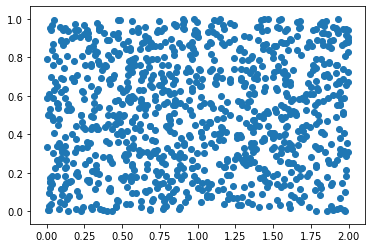

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X[0], X[1])

In [4]:
from lib.som import h_gauss

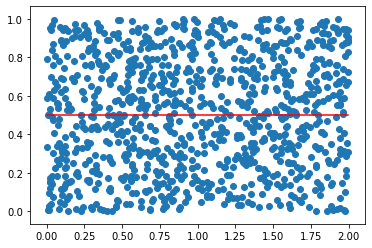

In [5]:
def initialize_som_prototypes(X, M):
    min_x0 = np.min(X[0])
    max_x0 = np.max(X[0])
    
    min_x1 = np.min(X[1])
    max_x1 = np.max(X[1])
    
    w0 = np.linspace(min_x0, max_x0, M)
    # w1 = np.linspace(min_x1, max_x1, M)
    w1 = np.full(M, 0.5)
    
    w = np.stack((w0, w1))
    return w

w_init = initialize_som_prototypes(X, 32)

fig, ax = plt.subplots()

ax.scatter(X[0], X[1])
ax.plot(w_init[0], w_init[1], "r")

In [6]:
from lib.k_means import dist
from lib.som import som_online

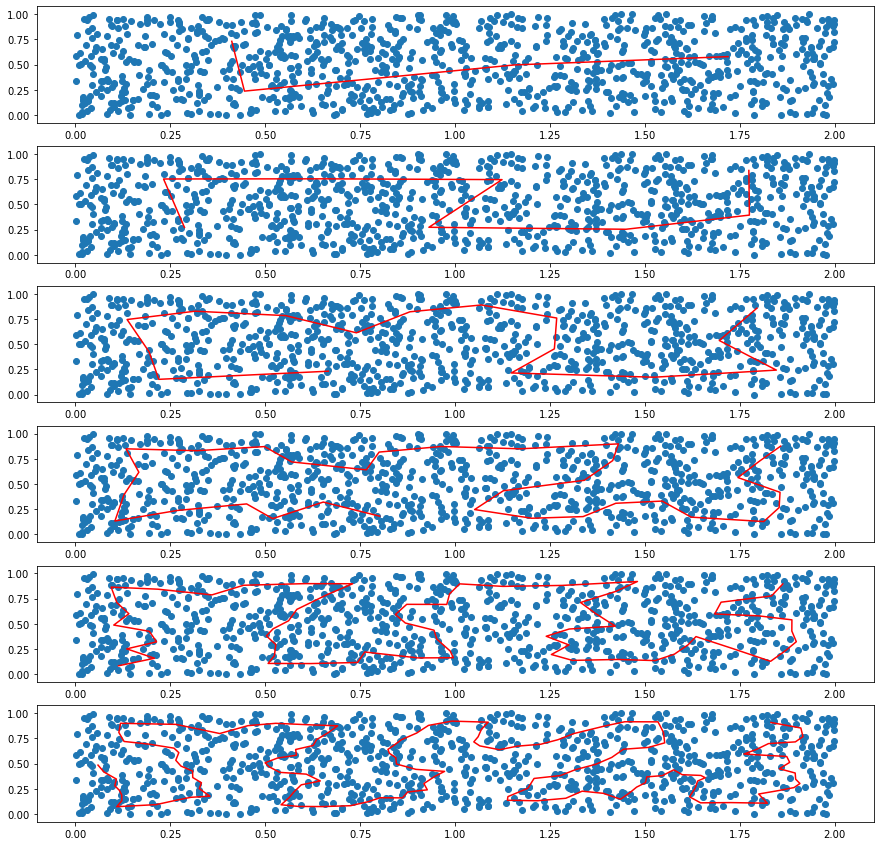

In [7]:
Ms = [2**n for n in np.arange(2, 8)]
fig, axes = plt.subplots(nrows=len(Ms), figsize=(15,15))

for i, M in zip(np.arange(len(Ms)), Ms):
    w0 = initialize_som_prototypes(X, M)
    w, epsilon_history, sigma_history, w_history = som_online(
        X=X, M=M, w0=w0, epsilon0=0.2, sigma0=6, epsilon_plateau=0.5, decay_epsilon=0.99, decay_sigma=0.995
    )
    
    ax = axes[i]
    ax.scatter(X[0], X[1])
    ax.plot(w[0], w[1], "r")

In [8]:
def visualize_params(epsilon_history, sigma_history):
    fig, ax = plt.subplots()

    x = range(len(epsilon_history))
    ax.plot(x, epsilon_history)
    ax.plot(x, sigma_history)
    return fig, ax

In [9]:
%matplotlib inline

In [10]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

M = 256
w0 = initialize_som_prototypes(X, M)
w, epsilon_history, sigma_history, w_history = som_online(
        X=X, M=M, w0=w0, epsilon0=0.2, sigma0=6, epsilon_plateau=0.5, decay_epsilon=0.99, decay_sigma=0.995
    )

scatter =  ax.scatter([], [])
ax.set_xlim([0, 2])

num_frames = 100
frame_scale = len(w_history) / num_frames

def update(i):
    label = f"timestep {int(i)}"
    i = int((i + 1) * frame_scale - 1)
    scatter.set_offsets(w_history[i].T)
    ax.set_xlabel(label)
    return (scatter,)

anim = FuncAnimation(fig, update, frames=np.arange(0, num_frames), interval=200)
plt.close()
HTML(anim.to_html5_video())